# Basic Sales Data Analysis

This notebook presents a basic analysis of sales data using Python, Pandas and SQL.

In [50]:
import pandas as pd 
from pathlib import Path
import sqlite3
import matplotlib.pyplot as plt

In [51]:
DATA_PATH = Path("..") / "data" / "data.csv"
df = pd.read_csv(DATA_PATH, parse_dates=["order_date"])
df.head()

,order_id,order_date,product,category,price,quantity,country
0,1,2024-01-05,Laptop,Electronics,3500,1,Poland
1,2,2024-01-07,Headphones,Electronics,300,2,Germany
2,3,2024-01-10,Office Chair,Furniture,800,1,Poland
3,4,2024-01-15,Laptop,Electronics,3500,1,France
4,5,2024-02-03,Desk,Furniture,1200,1,Germany


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   order_id    45 non-null     int64         
 1   order_date  45 non-null     datetime64[ns]
 2   product     45 non-null     object        
 3   category    45 non-null     object        
 4   price       45 non-null     int64         
 5   quantity    45 non-null     int64         
 6   country     45 non-null     object        
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 2.6+ KB


In [53]:
df.describe()

,order_id,order_date,price,quantity
count,45.000000,45,45.000000,45.000000
mean,23.000000,2024-06-24 13:20:00,1555.555556,1.422222
min,1.000000,2024-01-05 00:00:00,300.000000,1.000000
25%,12.000000,2024-03-18 00:00:00,800.000000,1.000000
50%,23.000000,2024-07-03 00:00:00,1200.000000,1.000000
75%,34.000000,2024-09-17 00:00:00,3500.000000,2.000000
max,45.000000,2024-12-18 00:00:00,3500.000000,3.000000
std,13.133926,NaN,1293.261479,0.621175


In [54]:
df["month"] = df["order_date"].dt.to_period("M")
df[["order_date", "month"]].head()

,order_date,month
0,2024-01-05,2024-01
1,2024-01-07,2024-01
2,2024-01-10,2024-01
3,2024-01-15,2024-01
4,2024-02-03,2024-02


In [55]:
monthly_sales = (
    df.groupby("month")["price"]
    .sum()
    .reset_index()
    .sort_values("month")
)
monthly_sales

,month,price
0,2024-01,8100
1,2024-02,5800
2,2024-03,5800
3,2024-04,5000
4,2024-05,5500
5,2024-06,5800
6,2024-07,5800
7,2024-08,5800
8,2024-09,5800
9,2024-10,5800


In [56]:
sales_by_country = (
    df.groupby("country")["price"]
    .sum()
    .reset_index()
    .sort_values("price", ascending=False)
)
sales_by_country

,country,price
2,Poland,28700
1,Germany,25900
0,France,15400


In [57]:
df.dtypes


order_id               int64
order_date    datetime64[ns]
product               object
category              object
price                  int64
quantity               int64
country               object
month              period[M]
dtype: object

In [58]:
df = df.drop(columns=["month"])

In [59]:
df.columns

Index(['order_id', 'order_date', 'product', 'category', 'price', 'quantity',
       'country'],
      dtype='object')

In [60]:
conn = sqlite3.connect(":memory:")
df.to_sql("sales", conn, index=False, if_exists="replace")

45

In [61]:


query = """
SELECT country, SUM(price * quantity) AS total_sales
FROM sales
GROUP BY country
ORDER BY total_sales DESC
"""
pd.read_sql(query, conn)

,country,total_sales
0,Germany,34900
1,Poland,30200
2,France,20300


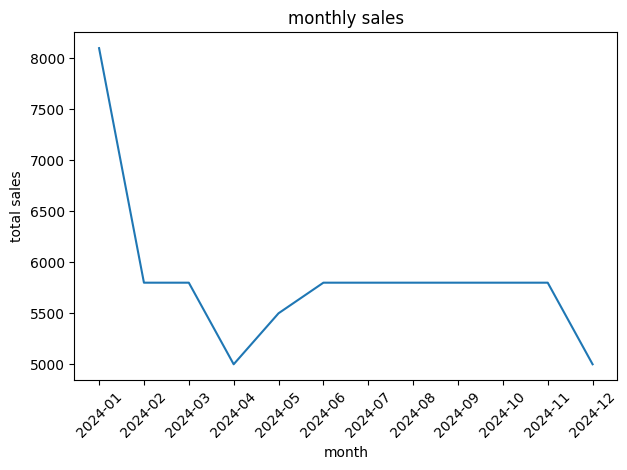

In [62]:
plt.figure()
plt.plot(
    monthly_sales["month"].astype(str),
    monthly_sales["price"]
)
plt.xticks(rotation=45)
plt.title("monthly sales")
plt.xlabel("month")
plt.ylabel("total sales")
plt.tight_layout()
plt.show()

## Conclusions

- Sales are distributed across the entire year with visible monthly variation.
- Electronics products generate the highest total revenue.
- Poland and Germany are the strongest markets by sales value.
- The analysis demonstrates basic use of Pandas, datetime features and SQL aggregation.